# Create Ideal Profiles for Various Data Science Roles

"Am I a better fit for a Data Scientist or a Machine Learning Engineer role?", "Which skills should I highlight on my resume to make my resume more relevant?"...These questions are critical for data science enthusiasts and job seekers. In this project, we'll use data science techniques to analyze data science roles :)   The analysis will be based on the different data science roles as discussed in [this post](https://www.datakademy.com/blog/1850977/navigating-data-science-career-landscape).

Let's get started!

#####  temp notes
to answer burning questions, such as what big data technology to learn? which role is the best fit based on my skills?

We'll approach this project in an iterative way:

- Iteration 1: Visualize different DS ideal profiles based on intuition (DONE)
- Iteration 2: Scrape data from Indeed to obtain job postings, recreate plots, and validate previous plots based on data obtained
- Iteration 3: Use text learning techniques to uncover more insights
- Iteration 4: Lable each job posting based on definition made in [this post](https://www.datakademy.com/blog/1850977/navigating-data-science-career-landscape) and build a classfication model
- Iteration 5: Deploy the model online using AWS

In this project, we'll use spider plots that can be found [here](https://python-graph-gallery.com/392-use-faceting-for-radar-chart/) to visuazlie different data science ideal profiles.

In the sample mentioned above, the data frame with below structure is used:

In [1]:
import pandas as pd

df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


However, the csv file I created manually is like this:

In [2]:
# Read in the data manually created
df = pd.read_csv('ideal_profiles.csv')
df

,Skill Categories,Data Analyst,Data Scientist,Data Engineer,Machine Learning Engineer,Skills in Category
0,Business,50,60,20,20,"story-telling, problem-solving, business acume..."
1,Database,30,50,60,50,"SQL, NoSQL"
2,Data Wrangling,30,60,40,60,NaN
3,Data Visualization,50,60,20,40,NaN
4,Math & Stats,30,60,20,50,"quantitative analysis, statistical modeling"
5,ML Modeling,0,50,30,60,NaN
6,Programming,20,40,60,60,"Python, R, Scala/Java"
7,Big Data,10,40,60,60,"distributed systems, ingestion (e.g. Kafka, Ki..."
8,Software Engineering,0,30,60,60,"system design, software development methodology"
9,ML Deployment,0,20,50,60,"operationalizing ML, optimizing ML, algorithm..."


To make my df compliant, let's use the following transformations:

In [3]:
# We don't need the last column
df = df.iloc[:,:-1]
df

,Skill Categories,Data Analyst,Data Scientist,Data Engineer,Machine Learning Engineer
0,Business,50,60,20,20
1,Database,30,50,60,50
2,Data Wrangling,30,60,40,60
3,Data Visualization,50,60,20,40
4,Math & Stats,30,60,20,50
5,ML Modeling,0,50,30,60
6,Programming,20,40,60,60
7,Big Data,10,40,60,60
8,Software Engineering,0,30,60,60
9,ML Deployment,0,20,50,60


In [4]:
# We need to transpose the df to get the desired format
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,10
Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
Data Analyst,50,30,30,50,30,0,20,10,0,0,0
Data Scientist,60,50,60,60,60,50,40,40,30,20,30
Data Engineer,20,60,40,20,20,30,60,60,60,50,60
Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


In [5]:
df.reset_index(inplace=True)
df

,index,0,1,2,3,4,5,6,7,8,9,10
0,Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
1,Data Analyst,50,30,30,50,30,0,20,10,0,0,0
2,Data Scientist,60,50,60,60,60,50,40,40,30,20,30
3,Data Engineer,20,60,40,20,20,30,60,60,60,50,60
4,Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


In [6]:
# Now we need the first row as the header 
df.columns = df.iloc[0]
df

,Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
0,Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
1,Data Analyst,50,30,30,50,30,0,20,10,0,0,0
2,Data Scientist,60,50,60,60,60,50,40,40,30,20,30
3,Data Engineer,20,60,40,20,20,30,60,60,60,50,60
4,Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


In [7]:
# Delete the first row
df.drop(0, inplace=True)
df

,Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
1,Data Analyst,50,30,30,50,30,0,20,10,0,0,0
2,Data Scientist,60,50,60,60,60,50,40,40,30,20,30
3,Data Engineer,20,60,40,20,20,30,60,60,60,50,60
4,Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


In [8]:
# Reset the index to make sure it'll work properly when plotting below
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)
df

,Skill Categories,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
0,Data Analyst,50,30,30,50,30,0,20,10,0,0,0
1,Data Scientist,60,50,60,60,60,50,40,40,30,20,30
2,Data Engineer,20,60,40,20,20,30,60,60,60,50,60
3,Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


In [9]:
# Rename the first column
df.rename(columns={'Skill Categories': 'group'}, inplace=True)
df

,group,Business,Database,Data Wrangling,Data Visualization,Math & Stats,ML Modeling,Programming,Big Data,Software Engineering,ML Deployment,Data Engineering
0,Data Analyst,50,30,30,50,30,0,20,10,0,0,0
1,Data Scientist,60,50,60,60,60,50,40,40,30,20,30
2,Data Engineer,20,60,40,20,20,30,60,60,60,50,60
3,Machine Learning Engineer,20,50,60,40,50,60,60,60,60,60,50


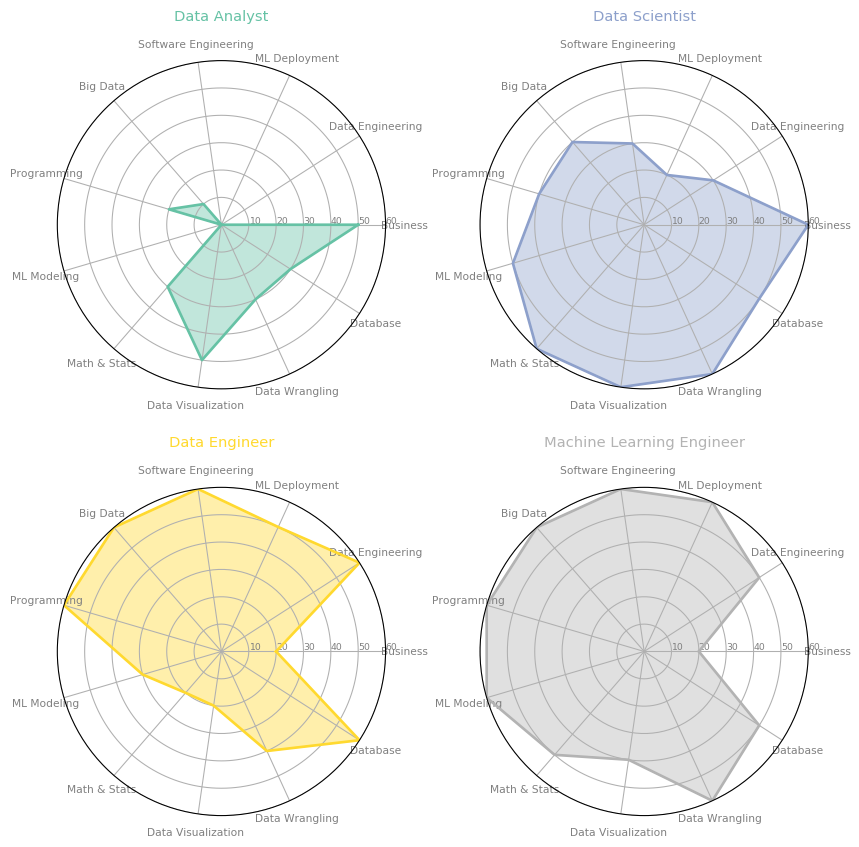

In [10]:
# Libraries
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

# Set data
#df = pd.DataFrame({
#'group': ['Data Analyst','Data Scientist','Data Engineer','Machine Learning Engineer'],
#'Business': [50, 60, 10, 10],
#'Database': [30, 50, 60, 40],
#'Data Wrangling': [30, 50, 60, 50],
#'Data Visualization': [50, 60, 20, 40],
#'Math & Stats': [30, 60, 20, 50],
#'ML Modeling': [0, 50, 30, 60],
#'Programming': [20, 40, 60, 60],
#'Big Data': [10, 40, 60, 40],
#'Software Engineering': [0, 30, 60, 60],
#'ML Deployment': [0, 20, 50, 60],
#'Data Engineering': [0, 30, 60, 50]
#})

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider(df, row, title, color):

    # number of variable
    skill_categories=list(df)[1:]
    N = len(skill_categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    #ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], skill_categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,60], ["10","20","30","40","50","60"], color="grey", size=7)
    plt.ylim(0,60)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(df=df, row=row, title=df['group'][row], color=my_palette(row))

# Adjust space between subplots
plt.subplots_adjust(hspace=0.3)

# Save the plot as a picture
plt.savefig('ideal-profiles.png')